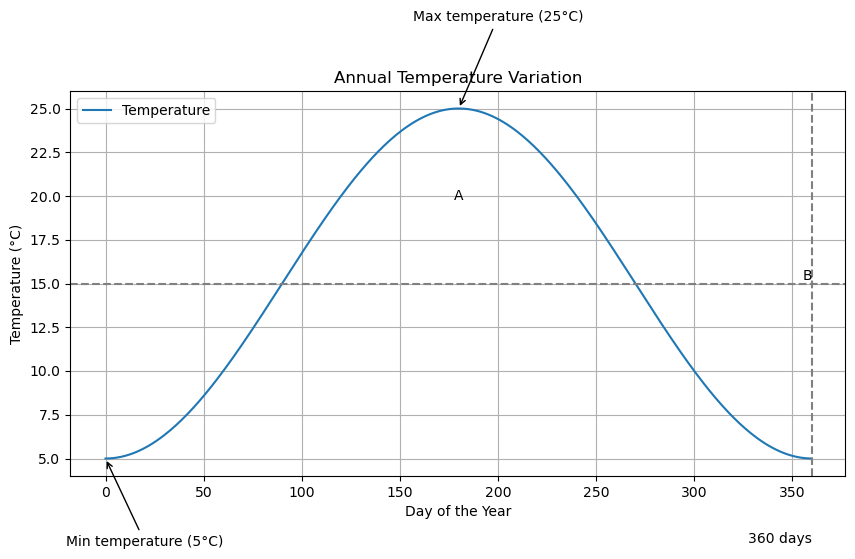

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """生成基于余弦波的年度温度变化"""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

# 温度振幅和平均温度
A = 10  # 温度振幅
B = 15  # 平均温度

# 生成一年的温度数据
T = generate_annual_temperatures(A, B, 360)

# 绘图
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(360), T, label='Temperature')
ax.annotate(f'Max temperature ({B+A}°C)', xy=(180, B + A), xytext=(200, B + A + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
ax.annotate(f'Min temperature ({B-A}°C)', xy=(0, B - A), xytext=(20, B - A - 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
ax.axhline(y=B, color='gray', linestyle='--')
ax.text(360, B, 'B', verticalalignment='bottom', horizontalalignment='right')
ax.text(180, B + A/2, 'A', verticalalignment='center', horizontalalignment='center')

ax.axvline(x=360, color='gray', linestyle='--')
ax.text(360, B - 15, '360 days', verticalalignment='bottom', horizontalalignment='right')

ax.set_title('Annual Temperature Variation')
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Temperature (°C)')

ax.grid(True)

ax.legend()
plt.show()


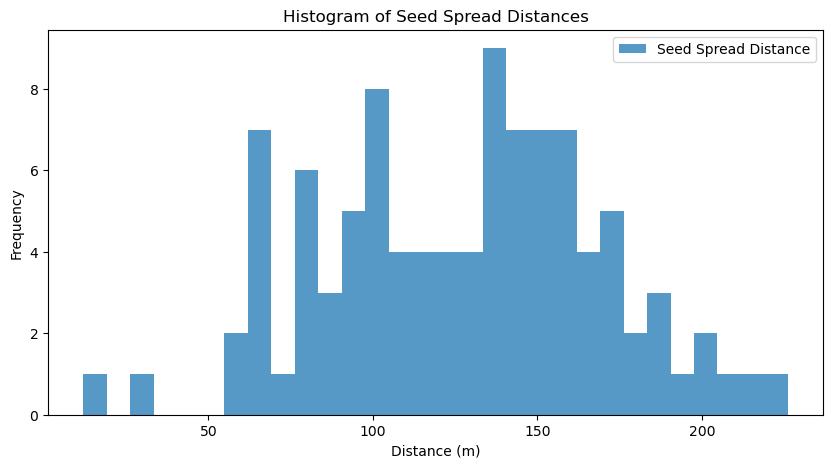

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_b():
    """ 根据给定的条件计算b的值 """
    # P(sL > 10) = 0.5% => P(sL <= 10) = 1 - 0.5% = 0.995
    # 解 0.995 = 1 - e^(-b * 10)
    b = -np.log(1 - 0.995) / 10
    return b

def generate_wind_speed(n, mean=5, std=2):
    """ 生成正态分布的水平风速数据 """
    return np.random.normal(mean, std, n)

def calculate_normal_distance(h, vh, vv=0.4):
    """ 计算正常散布距离sN """
    return (h / vv) * vh

def simulate_long_distance(n, b):
    """ 根据指数分布模拟长距离sL """
    return np.random.exponential(1/b, n)

def simulate_seed_spread(n, h=10):
    """ 模拟n个种子的散布，h为绒球的高度，假设固定为10米 """
    b = calculate_b()  # 计算b值
    vh = generate_wind_speed(n)  # 水平风速
    sN = calculate_normal_distance(h, vh)  # 正常散布距离
    sL = simulate_long_distance(n, b)  # 长距离散布
    
    # 取正常距离和长距离中的较大值
    actual_distances = np.maximum(sN, sL)
    
    return actual_distances

# 模拟100个种子的散布
n = 100
distances = simulate_seed_spread(n)

plt.figure(figsize=(10, 5))
plt.hist(distances, bins=30, alpha=0.75, label='Seed Spread Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Seed Spread Distances')
plt.legend()
plt.show()


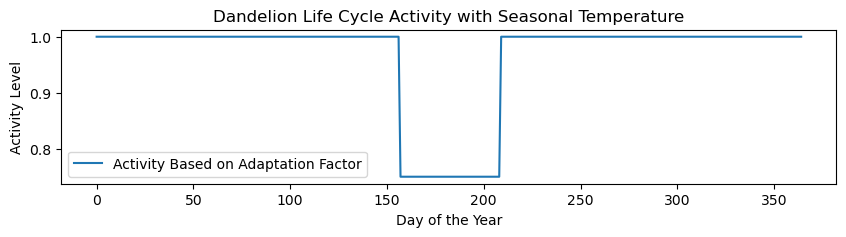

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """Generate annual temperature variations using a cosine wave."""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

def adaptation_factor(T, T_optimal_min=10, T_optimal_max=20, T_max=25):
    """Calculate adaptation factor based on temperature, incorporating optimal and maximum temperature ranges."""
    if T < T_optimal_min or T > T_max:
        return 0
    elif T > T_optimal_max:
        # Reduce adaptation factor linearly from optimal max to max temperature
        return 1 - (T - T_optimal_max) / (T_max - T_optimal_max)
    else:
        # Optimal growth conditions
        return 1

def simulate_life_cycle(days, T_data, T_worst=0, T_best=24):
    """Simulate the life cycle of dandelions based on daily temperature data."""
    active_stage = np.zeros(days)
    for day in range(days):
        T = T_data[day]
        k = adaptation_factor(T, T_worst, T_best)
        if T < 0:
            active_stage[day] = 0  # Dormancy
        elif T > 24:
            active_stage[day] = 0.75  # Maintain state
        else:
            active_stage[day] = k  # Active growth based on adaptation factor
    return active_stage

# Parameters for temperature simulation
A = 10  # Temperature amplitude
B = 15  # Average temperature
days = 365  # Number of days in a year

# Generate temperature data
T_data = generate_annual_temperatures(A, B, days)

# Simulate dandelion life cycle
activity = simulate_life_cycle(days, T_data)

# Plot the simulation results
plt.figure(figsize=(10, 2))
plt.plot(activity, label='Activity Based on Adaptation Factor')
plt.xlabel('Day of the Year')
plt.ylabel('Activity Level')
plt.title('Dandelion Life Cycle Activity with Seasonal Temperature')
plt.legend()
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def adaptation_factor(T):
    """根据温度计算适应因子，包括休眠、生长缓慢和正常生长阶段"""
    if T < 0:
        return 0  # 休眠
    elif 0 <= T <= 10:
        return 0.5  # 生长缓慢
    elif 10 < T < 20:
        return 1  # 最佳生长温度
    elif 20 <= T < 25:
        return 0.75  # 生长缓慢
    else:
        return 0.25  # 高温下的生长减缓

def main_simulation(state, days=360, iterations=1000):
    # 环境参数，以加利福尼亚为例
    mu_T, sigma_T = 16.20, 4.99
    mu_W, sigma_W = 6.02, 0.90

    # 初始化结果存储数组
    plant_distribution = np.zeros((iterations, days))

    # 运行蒲公英生命周期模拟
    for i in range(iterations):
        # 生成温度数据
        T_data = np.random.normal(mu_T, sigma_T, days)
        
        # 模拟每天的活动情况
        for day in range(days):
            # 计算适应因子
            k = adaptation_factor(T_data[day])
            # 更新状态，假设0.75以上才能生长和散布种子
            if k > 0.75:
                plant_distribution[i, day] = 1
    
    # 统计每个月的植株分布，确保不超出数组界限
    monthly_distribution = np.mean(plant_distribution[:, [29, 89, 179, 359]], axis=0)
    return monthly_distribution

# 调用模拟函数
result = main_simulation('CA')
print("植株分布数据:", result)


植株分布数据: [0.669 0.688 0.663 0.665]


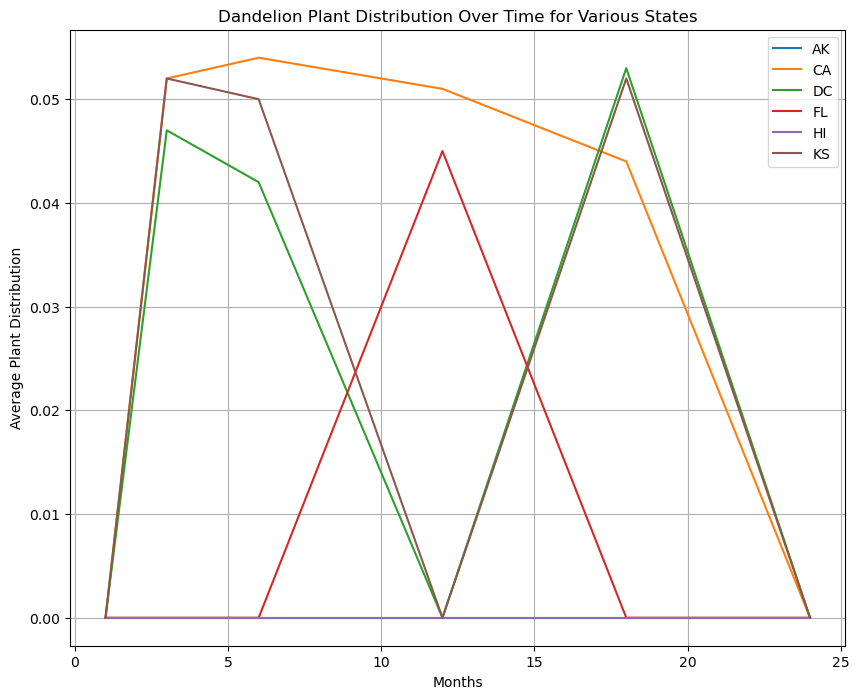

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(mu_T, sigma_T, days):
    """Generate annual temperature variations using a cosine wave for more natural seasonal variation."""
    t = np.arange(days)
    temperature_variation = sigma_T * np.cos(2 * np.pi * t / days)
    return mu_T + temperature_variation

def adaptation_factor(T):
    """根据温度计算适应因子，包括休眠、生长缓慢和正常生长阶段"""
    if T < 0:
        return 0  # 休眠
    elif 0 <= T <= 10:
        return 0.5  # 生长缓慢
    elif 10 < T < 20:
        return 1  # 最佳生长温度
    elif 20 <= T < 25:
        return 0.75  # 生长缓慢
    else:
        return 0.25  # 高温下的生长减缓

def seed_spread(v_wind):
    """计算种子散布距离基于风速"""
    spread_factor = np.maximum(0, v_wind - 1)  # 假设风速超过1m/s才有效散布种子
    return spread_factor * 5  # 假设每多1m/s风速，种子可额外散布5米

def simulate_multiple_years(state, mu_T, sigma_T, mu_W, sigma_W, years=2, days_per_year=360, iterations=1000):
    total_days = years * days_per_year
    plant_distribution = np.zeros((iterations, total_days))

    # 运行蒲公英生命周期模拟
    for i in range(iterations):
        # 生成温度数据
        T_data = generate_annual_temperatures(mu_T, sigma_T, total_days)
        # 生成风速数据
        wind_speeds = np.random.normal(mu_W, sigma_W, total_days)
        
        # 模拟每天的活动情况
        for day in range(total_days):
            # 计算适应因子
            k = adaptation_factor(T_data[day])
            # 更新状态，考虑风速对散布的影响
            if k > 0.75:
                # 计算种子的散布距离
                spread_distance = seed_spread(wind_speeds[day])
                # 随机确定种子是否成功定居
                if spread_distance > 0 and np.random.rand() < 0.05:  # 假设有5%的种子能成功定居
                    plant_distribution[i, day] = 1
    
    # 统计每个月的植株分布
    months = [30, 90, 180, 360, 540, 720]  # 1, 3, 6, 12, 18, 24个月
    monthly_distribution = np.mean(plant_distribution[:, [month - 1 for month in months]], axis=0)
    return monthly_distribution

# 环境参数
states = ["AK", "CA", "DC", "FL", "HI", "KS"]
mu_Ts = [-0.05, 16.20, 12.64, 22.11, 22.75, 12.58]
sigma_Ts = [9.08, 4.99, 8.63, 4.76, 1.40, 9.98]
mu_Ws = [7.27, 6.02, 13.97, 6.51, 6.23, 8.58]
sigma_Ws = [1.42, 0.90, 9.51, 1.71, 0.69, 0.95]

# 运行模拟并绘制结果
plt.figure(figsize=(10, 8))
for i, state in enumerate(states):
    result = simulate_multiple_years(state, mu_Ts[i], sigma_Ts[i], mu_Ws[i], sigma_Ws[i])
    plt.plot([1, 3, 6, 12, 18, 24], result, label=f'{state}')

plt.xlabel('Months')
plt.ylabel('Average Plant Distribution')
plt.title('Dandelion Plant Distribution Over Time for Various States')
plt.legend()
plt.grid(True)
plt.show()


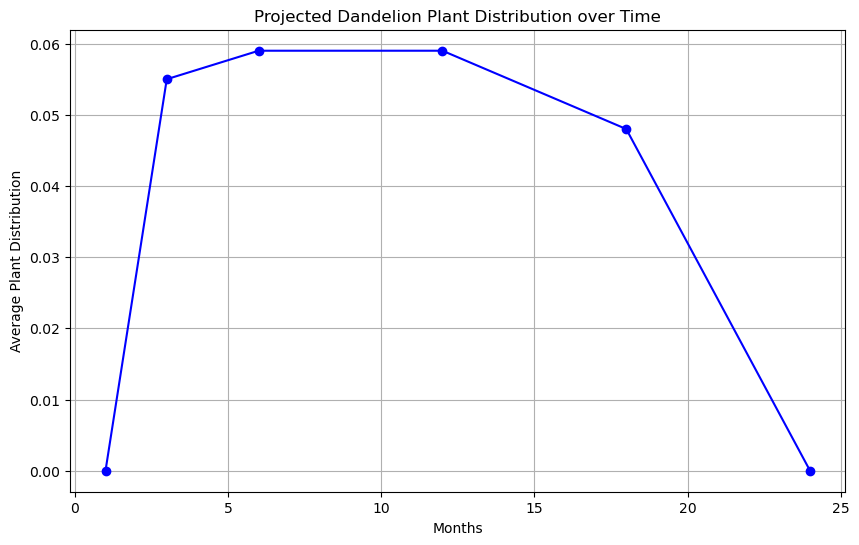

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(mu_T, sigma_T, days):
    """Generate annual temperature variations using a cosine wave for seasonal variation."""
    t = np.arange(days)
    return mu_T + sigma_T * np.cos(2 * np.pi * t / days)

def adaptation_factor(T):
    """Calculate adaptation factor based on temperature."""
    if T < 0:
        return 0
    elif 0 <= T <= 10:
        return 0.5
    elif 10 < T < 20:
        return 1
    elif 20 <= T < 25:
        return 0.75
    else:
        return 0.25

def seed_spread(v_wind):
    """Calculate potential seed spread based on wind speed."""
    return np.maximum(0, v_wind - 1) * 5

def simulate_multiple_years(mu_T, sigma_T, mu_W, sigma_W, years=2, days_per_year=360, iterations=1000):
    total_days = years * days_per_year
    plant_distribution = np.zeros((iterations, total_days))

    for i in range(iterations):
        T_data = generate_annual_temperatures(mu_T, sigma_T, total_days)
        wind_speeds = np.random.normal(mu_W, sigma_W, total_days)

        for day in range(total_days):
            k = adaptation_factor(T_data[day])
            if k > 0.75:
                spread_distance = seed_spread(wind_speeds[day])
                if spread_distance > 0 and np.random.rand() < 0.05:
                    plant_distribution[i, day] = 1

    months_indices = [30, 90, 180, 360, 540, 720]
    monthly_distribution = np.mean(plant_distribution[:, [m - 1 for m in months_indices]], axis=0)
    return monthly_distribution

# Define environmental parameters for one state as an example
mu_T, sigma_T = 16.20, 4.99  # California's average temperature and amplitude
mu_W, sigma_W = 6.02, 0.90   # California's average wind speed and standard deviation

# Simulate and plot the results
distribution = simulate_multiple_years(mu_T, sigma_T, mu_W, sigma_W)
months = [1, 3, 6, 12, 18, 24]

plt.figure(figsize=(10, 6))
plt.plot(months, distribution, marker='o', linestyle='-', color='b')
plt.title('Projected Dandelion Plant Distribution over Time')
plt.xlabel('Months')
plt.ylabel('Average Plant Distribution')
plt.grid(True)
plt.show()


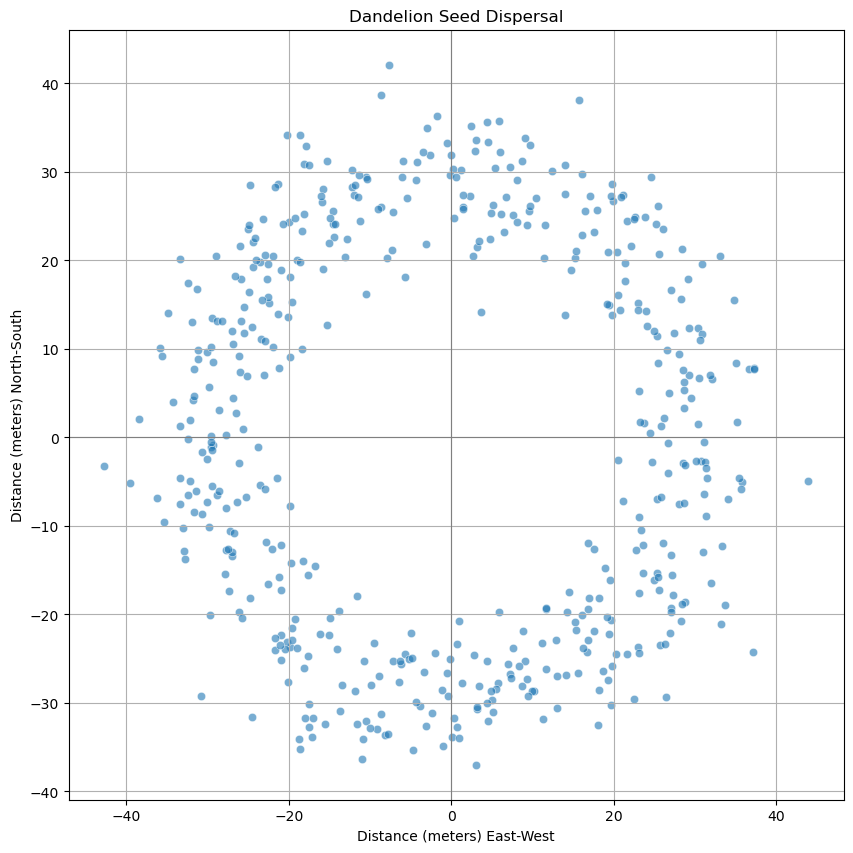

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wind_speed(mu, sigma, n):
    """Generate wind speeds for seed dispersal simulation."""
    return np.random.normal(mu, sigma, n)

def disperse_seeds(n, mu_W, sigma_W):
    """Simulate the dispersal of n dandelion seeds."""
    wind_speeds = generate_wind_speed(mu_W, sigma_W, n)
    angles = np.random.uniform(0, 2 * np.pi, n)  # Random direction for each seed
    
    # Seed dispersal is proportional to wind speed
    distances = wind_speeds * 5  # Simple model: distance is wind speed times 5 meters
    x_positions = distances * np.cos(angles)
    y_positions = distances * np.sin(angles)
    return x_positions, y_positions

# Parameters
n_seeds = 500  # Number of seeds to simulate
mu_W = 6.02  # Average wind speed (example from California)
sigma_W = 0.90  # Standard deviation of wind speed

# Generate seed dispersal data
x, y = disperse_seeds(n_seeds, mu_W, sigma_W)

# Plotting the dispersal as a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Dandelion Seed Dispersal')
plt.xlabel('Distance (meters) East-West')
plt.ylabel('Distance (meters) North-South')
plt.axhline(0, color='grey', lw=0.8)
plt.axvline(0, color='grey', lw=0.8)
plt.grid(True)
plt.show()


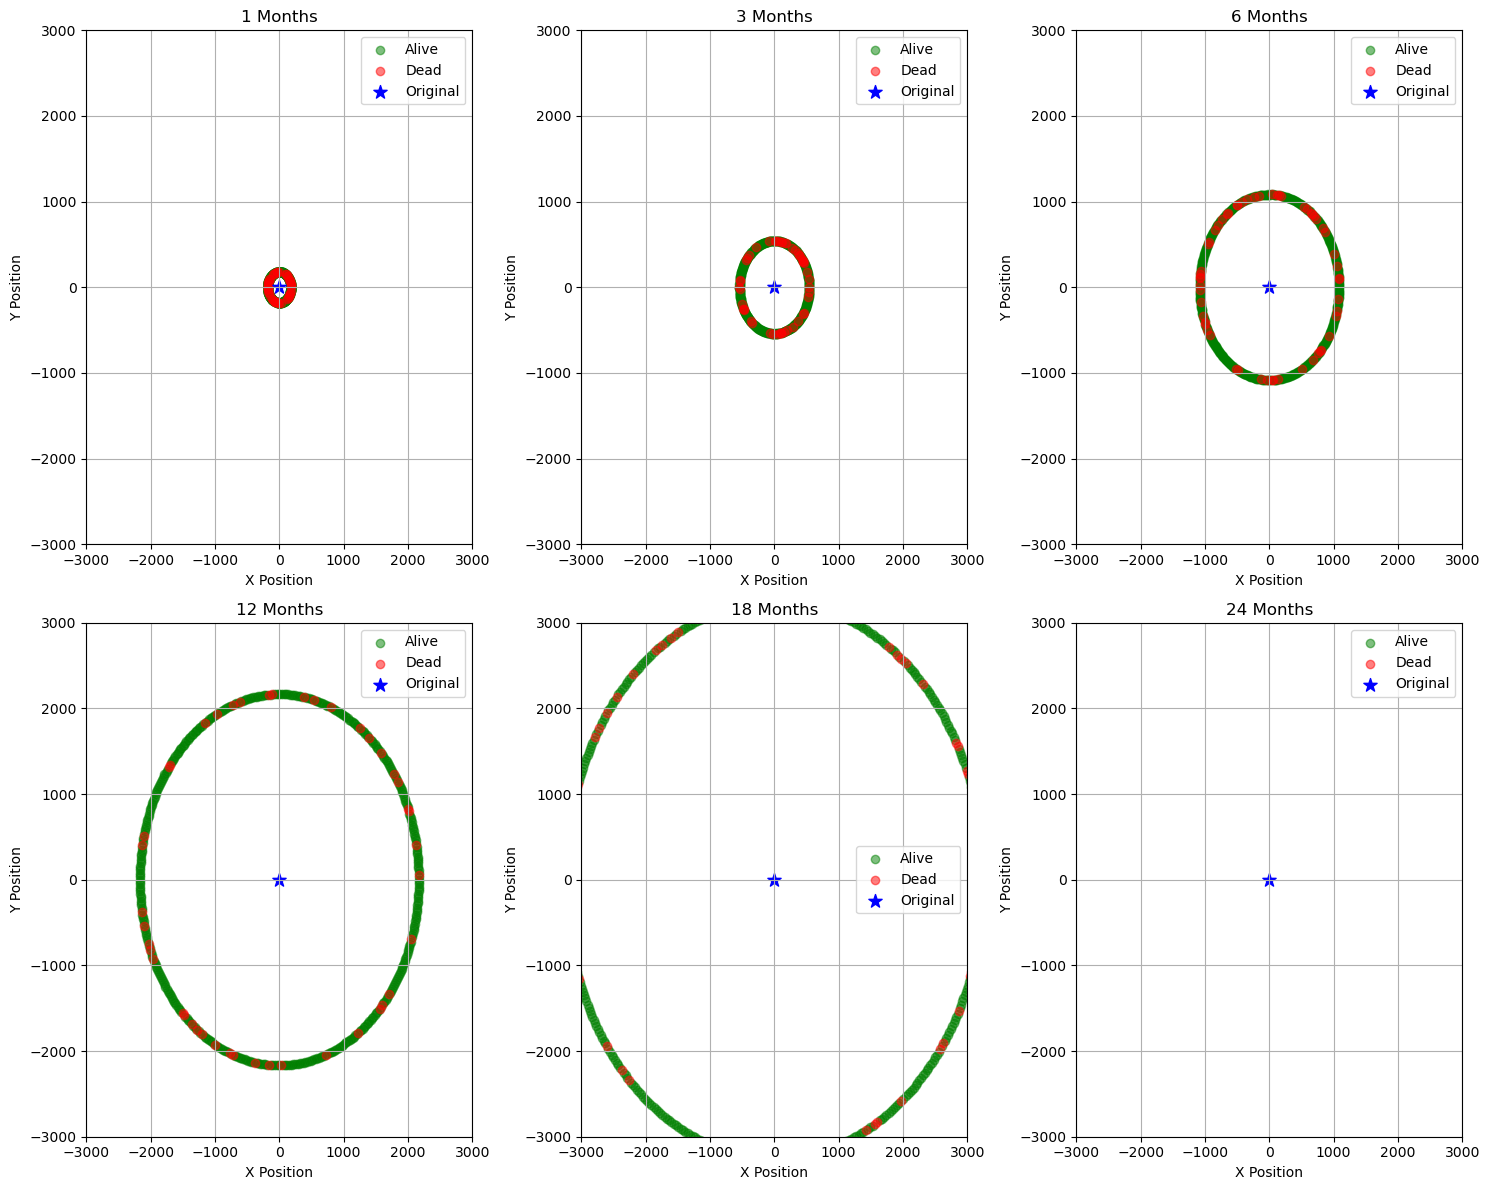

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_seed_spread_and_mortality(days_per_month=30, months=[1, 3, 6, 12, 18, 24], iterations=500, mu_W=6.02, sigma_W=0.90, mortality_rate=0.1):
    positions = {month: [] for month in months}  # Dictionary to store positions for each month
    directions = np.linspace(0, 2 * np.pi, iterations, endpoint=False)  # Random directions for seed spread

    for month in months:
        days = days_per_month * month
        distances = np.random.normal(mu_W * days, sigma_W, iterations)  # Simulate distances
        x_positions = distances * np.cos(directions)  # X coordinates
        y_positions = distances * np.sin(directions)  # Y coordinates

        # Apply mortality rate
        alive_mask = np.random.rand(iterations) > mortality_rate  # Determine which plants survive
        dead_positions = np.vstack((x_positions[~alive_mask], y_positions[~alive_mask])).T
        alive_positions = np.vstack((x_positions[alive_mask], y_positions[alive_mask])).T

        positions[month] = (alive_positions, dead_positions)  # Store alive and dead positions

    return positions

# Run simulation
positions = simulate_seed_spread_and_mortality()

# Plot results
plt.figure(figsize=(15, 12))
for i, (month, (alive_pos, dead_pos)) in enumerate(positions.items(), 1):
    plt.subplot(2, 3, i)
    if alive_pos.size > 0:
        plt.scatter(alive_pos[:, 0], alive_pos[:, 1], color='green', alpha=0.5, label='Alive')
    if dead_pos.size > 0:
        plt.scatter(dead_pos[:, 0], dead_pos[:, 1], color='red', alpha=0.5, label='Dead')
    plt.scatter([0], [0], color='blue', marker='*', s=100, label='Original')  # Mark the origin
    plt.title(f'{month} Months')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.xlim([-3000, 3000])
    plt.ylim([-3000, 3000])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


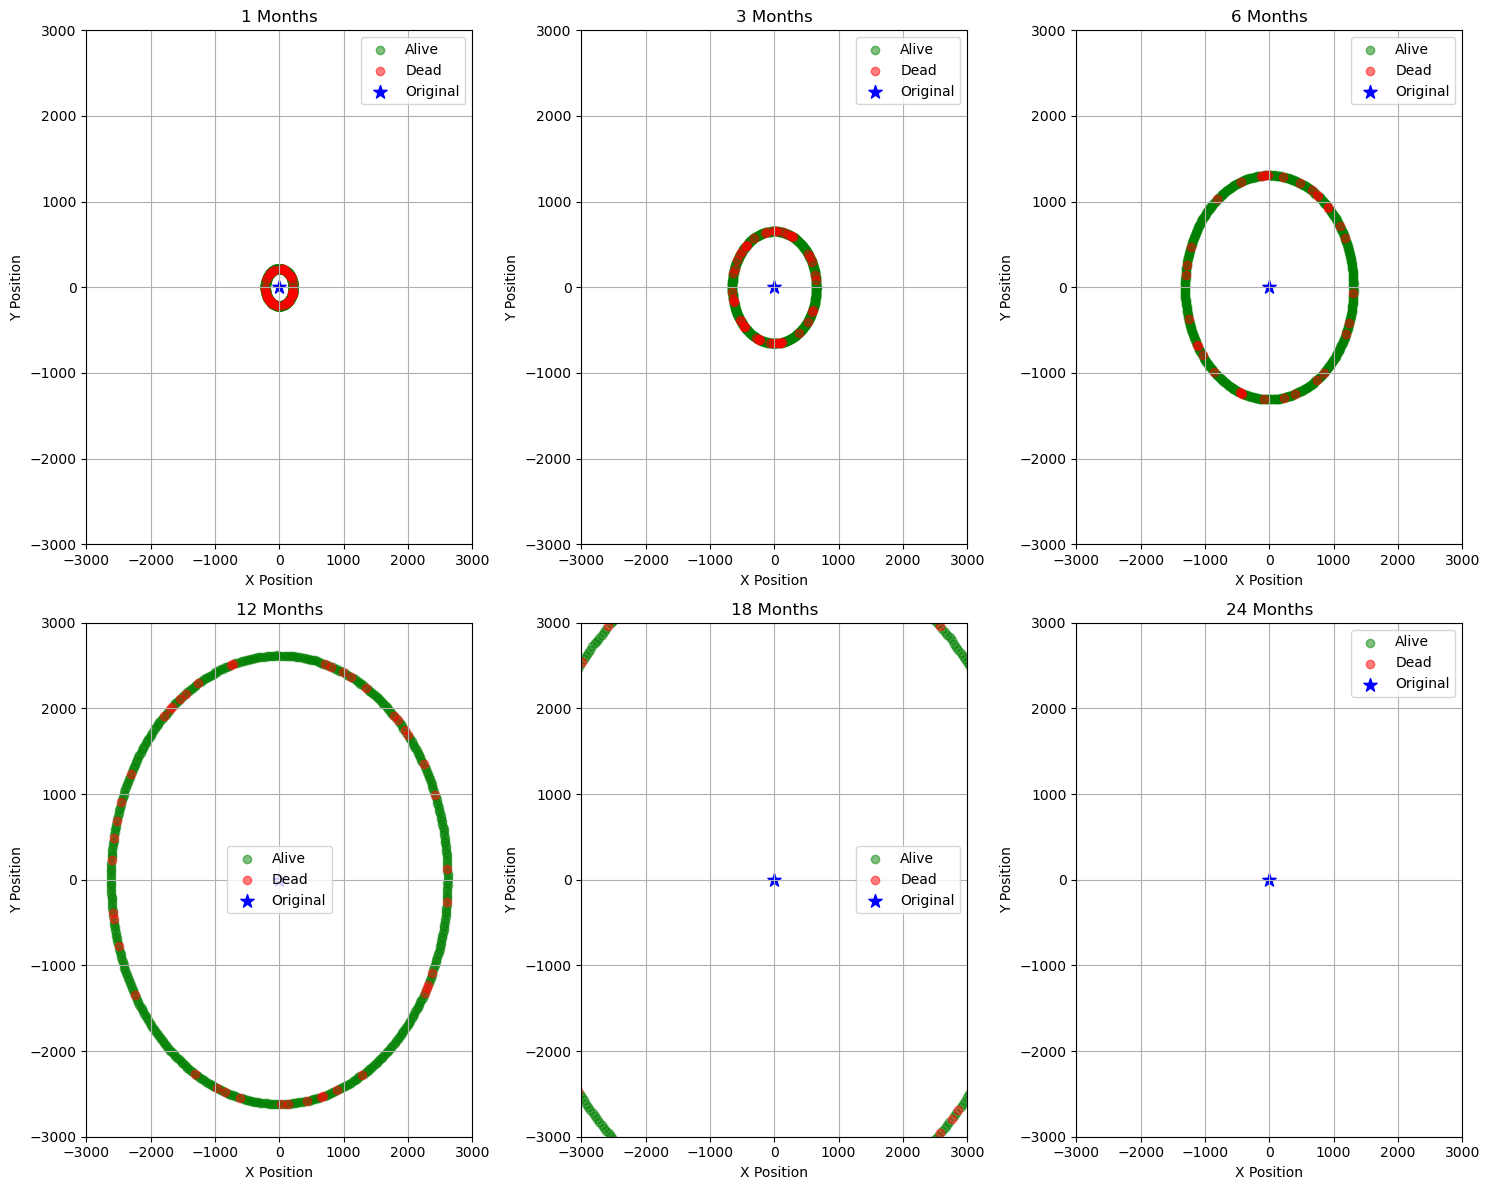

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(mu_T, sigma_T, days):
    """Generate temperatures with seasonal variation, adjusting for cold winter periods."""
    t = np.arange(days)
    return mu_T + sigma_T * np.cos(2 * np.pi * t / days)

def adaptation_factor(T):
    """Adaptation based on temperature, considering dormancy below freezing."""
    if T < 0:
        return 0  # Dormant if temperature is below 0°C
    elif 0 <= T <= 10:
        return 0.5
    elif 10 < T < 20:
        return 1
    elif 20 <= T < 25:
        return 0.75
    else:
        return 0.25

def simulate_seed_spread(months, days_per_month=30, iterations=500, mu_W=7.27, sigma_W=1.42, mortality_rate=0.1):
    positions = {}
    directions = np.linspace(0, 2 * np.pi, iterations, endpoint=False)

    for month in months:
        days = days_per_month * month
        distances = np.random.normal(mu_W * days, sigma_W, iterations)
        x_positions = distances * np.cos(directions)
        y_positions = distances * np.sin(directions)

        alive_mask = np.random.rand(iterations) > mortality_rate
        dead_positions = np.vstack((x_positions[~alive_mask], y_positions[~alive_mask])).T
        alive_positions = np.vstack((x_positions[alive_mask], y_positions[alive_mask])).T

        positions[month] = (alive_positions, dead_positions)

    return positions

# Run simulation for Alaska
mu_T, sigma_T = -0.05, 9.08  # Mean and amplitude of temperature
mu_W, sigma_W = 7.27, 1.42   # Mean wind speed and standard deviation
months = [1, 3, 6, 12, 18, 24]

positions = simulate_seed_spread(months, mu_W=mu_W, sigma_W=sigma_W)

# Plot results
plt.figure(figsize=(15, 12))
for i, (month, (alive_pos, dead_pos)) in enumerate(positions.items(), 1):
    plt.subplot(2, 3, i)
    if alive_pos.size > 0:
        plt.scatter(alive_pos[:, 0], alive_pos[:, 1], color='green', alpha=0.5, label='Alive')
    if dead_pos.size > 0:
        plt.scatter(dead_pos[:, 0], dead_pos[:, 1], color='red', alpha=0.5, label='Dead')
    plt.scatter([0], [0], color='blue', marker='*', s=100, label='Original')
    plt.title(f'{month} Months')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.xlim([-3000, 3000])
    plt.ylim([-3000, 3000])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
